In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
data = pd.read_csv('data\household_power_consumption.txt', sep=';',
                 infer_datetime_format=True,low_memory=False, na_values=['nan','?'])

In [47]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [48]:
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [49]:
datetime_str = data['Date'] + ' ' + data['Time']

In [50]:
data['datetime'] = pd.to_datetime(datetime_str, format='%d/%m/%Y %H:%M:%S')

In [51]:
# Drop the original date and time columns
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [52]:
# Handle missing values
data.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
data.dropna(inplace=True)  # Drop rows with missing values

In [53]:
data.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object

In [54]:
# Convert numeric columns to appropriate data types
numeric_cols = data.columns[:-1].tolist()  # Exclude the datetime column
data[numeric_cols] = data[numeric_cols].astype(float)

### Basic Exploration Data Analysis

In [55]:
# Display the first few rows of the dataset
data.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00


In [56]:
data.shape

(2049280, 8)

In [57]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [58]:
data.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object

### Visualize Data Distribution

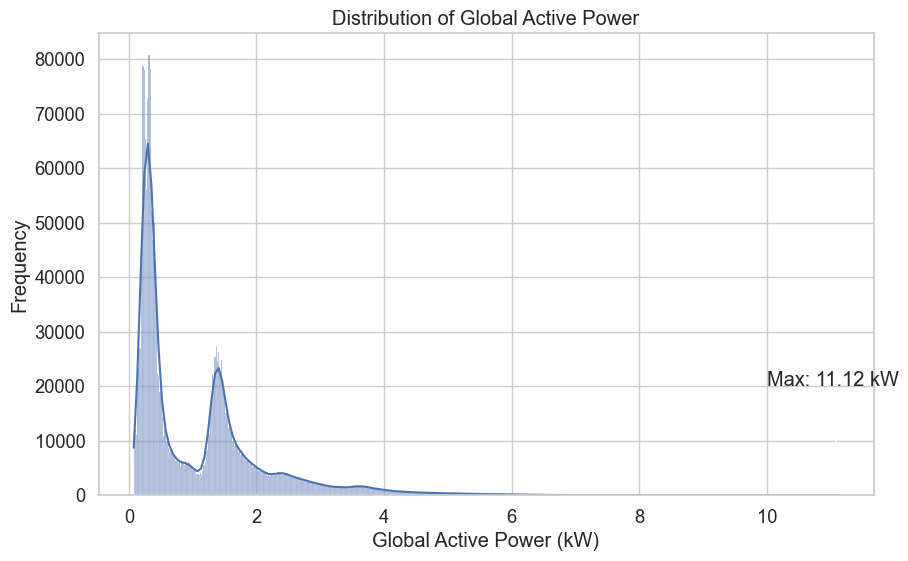

In [59]:
# Histogram of global_active_power
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Global_active_power', kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')

# Annotate maximum value
max_power = data['Global_active_power'].max()
plt.annotate(f'Max: {max_power:.2f} kW', xy=(max_power, 0), xytext=(10, 20000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


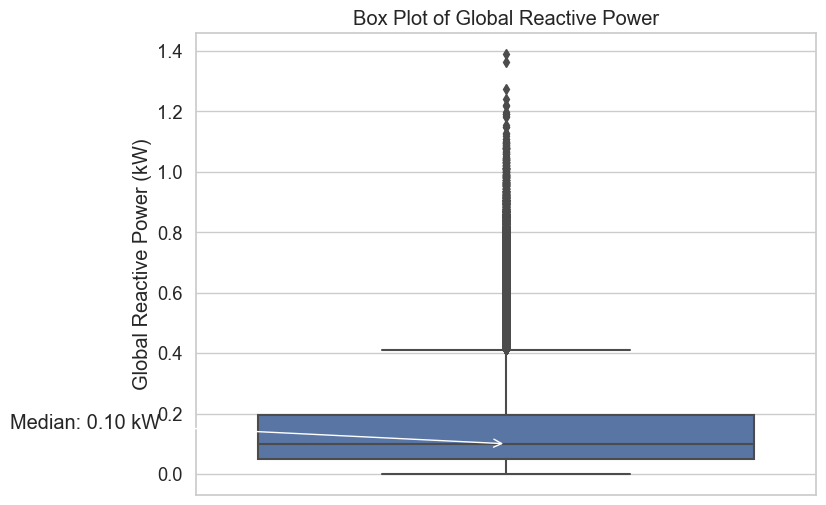

In [60]:
# Box plot of global_reactive_power
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Global_reactive_power')
plt.title('Box Plot of Global Reactive Power')
plt.ylabel('Global Reactive Power (kW)')

# Annotate median value
median_power = data['Global_reactive_power'].median()
plt.annotate(f'Median: {median_power:.2f} kW', xy=(0, median_power), xytext=(-0.8, median_power + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

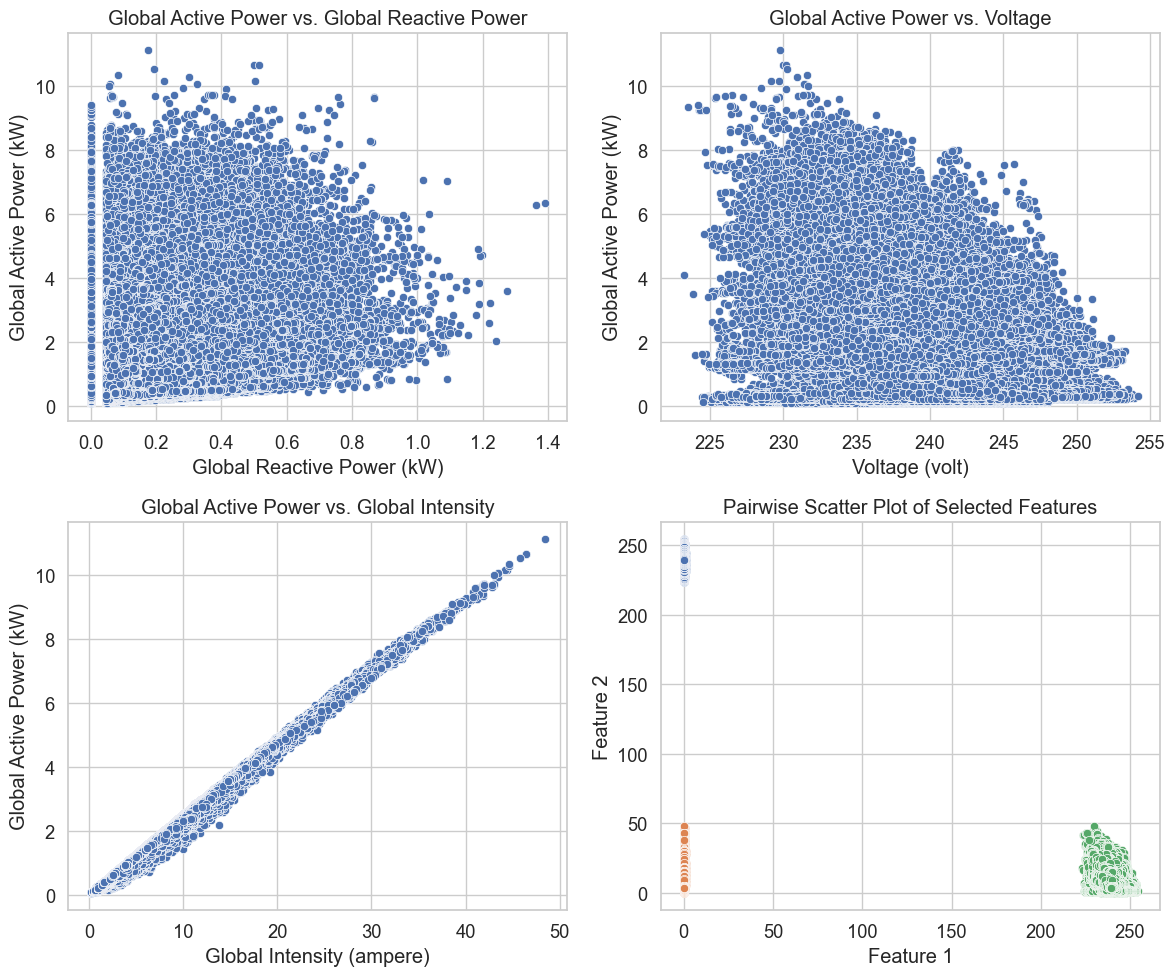

In [77]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot of global_active_power vs. global_reactive_power
sns.scatterplot(data=data, x='Global_reactive_power', y='Global_active_power', ax=axes[0, 0])
axes[0, 0].set_title('Global Active Power vs. Global Reactive Power')
axes[0, 0].set_xlabel('Global Reactive Power (kW)')
axes[0, 0].set_ylabel('Global Active Power (kW)')

# Scatter plot of global_active_power vs. voltage
sns.scatterplot(data=data, x='Voltage', y='Global_active_power', ax=axes[0, 1])
axes[0, 1].set_title('Global Active Power vs. Voltage')
axes[0, 1].set_xlabel('Voltage (volt)')
axes[0, 1].set_ylabel('Global Active Power (kW)')

# Scatter plot of global_active_power vs. global_intensity
sns.scatterplot(data=data, x='Global_intensity', y='Global_active_power', ax=axes[1, 0])
axes[1, 0].set_title('Global Active Power vs. Global Intensity')
axes[1, 0].set_xlabel('Global Intensity (ampere)')
axes[1, 0].set_ylabel('Global Active Power (kW)')

# Pairwise scatter plot of selected features
sns.scatterplot(data=data, x='Global_reactive_power', y='Voltage', ax=axes[1, 1])
sns.scatterplot(data=data, x='Global_reactive_power', y='Global_intensity', ax=axes[1, 1])
sns.scatterplot(data=data, x='Voltage', y='Global_intensity', ax=axes[1, 1])
axes[1, 1].set_title('Pairwise Scatter Plot of Selected Features')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

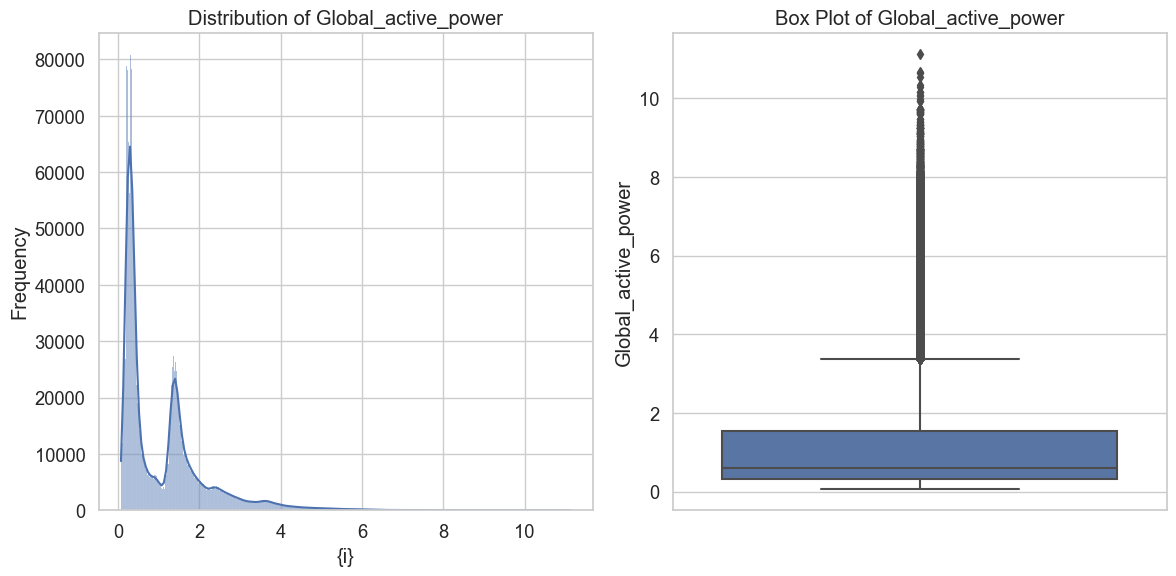

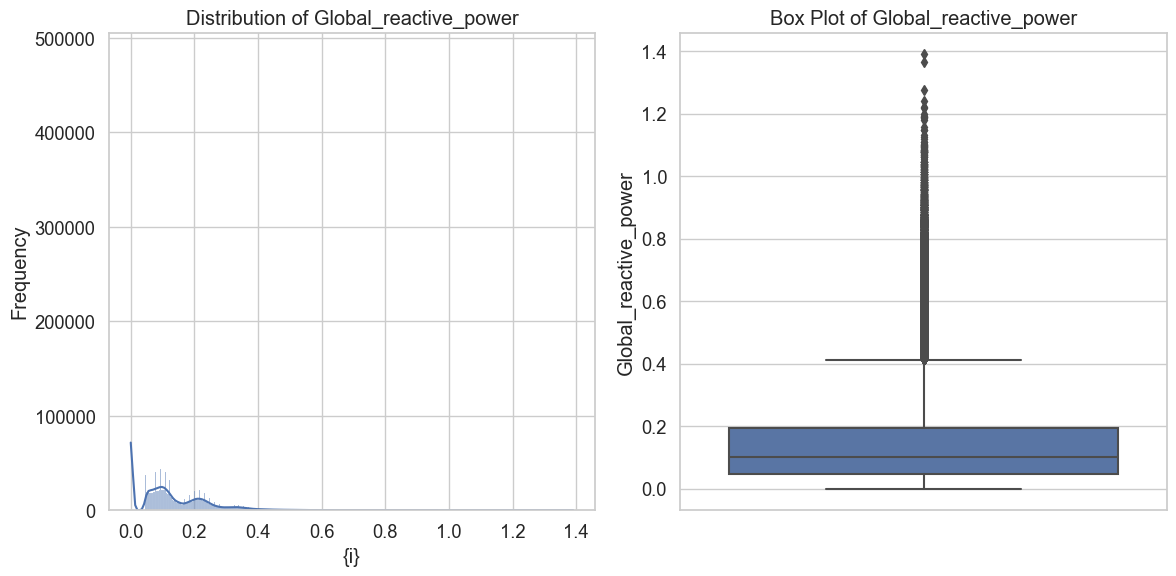

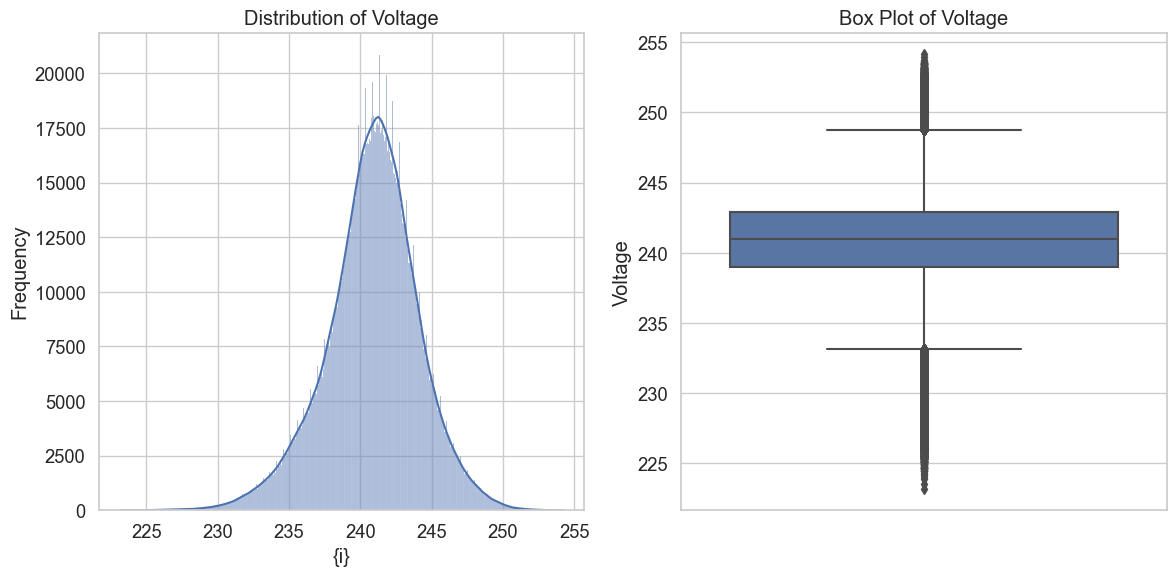

In [83]:
for i in ['Global_active_power', 'Global_reactive_power', 'Voltage']:
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram of global_active_power
    sns.histplot(data=data, x=f'{i}', kde=True, ax=axs[0])
    axs[0].set_title(f'Distribution of {i}')
    axs[0].set_xlabel('{i}')
    axs[0].set_ylabel('Frequency')

    # Box plot of global_active_power
    sns.boxplot(data=data, y=f'{i}', ax=axs[1])
    axs[1].set_title(f'Box Plot of {i}')
    axs[1].set_ylabel(f'{i}')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

### Explore Relationships and Correlations

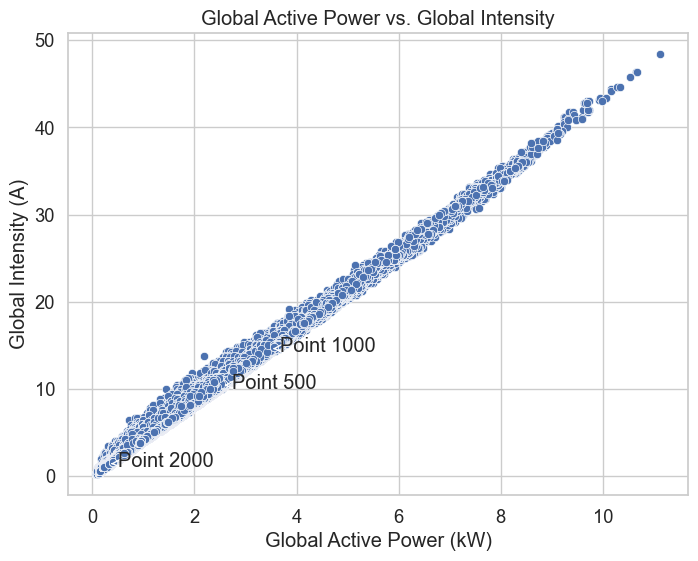

In [61]:
# Scatter plot of global_active_power vs. global_intensity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Global_active_power', y='Global_intensity')
plt.title('Global Active Power vs. Global Intensity')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Intensity (A)')

# Annotate specific points
highlight_indices = [500, 1000, 2000]  # Indices of points to highlight
highlight_power = data.loc[highlight_indices, 'Global_active_power']
highlight_intensity = data.loc[highlight_indices, 'Global_intensity']

for i in range(len(highlight_indices)):
    plt.annotate(f'Point {highlight_indices[i]}', xy=(highlight_power.iloc[i], highlight_intensity.iloc[i]),
                 xytext=(highlight_power.iloc[i] + 0.2, highlight_intensity.iloc[i] - 0.4),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

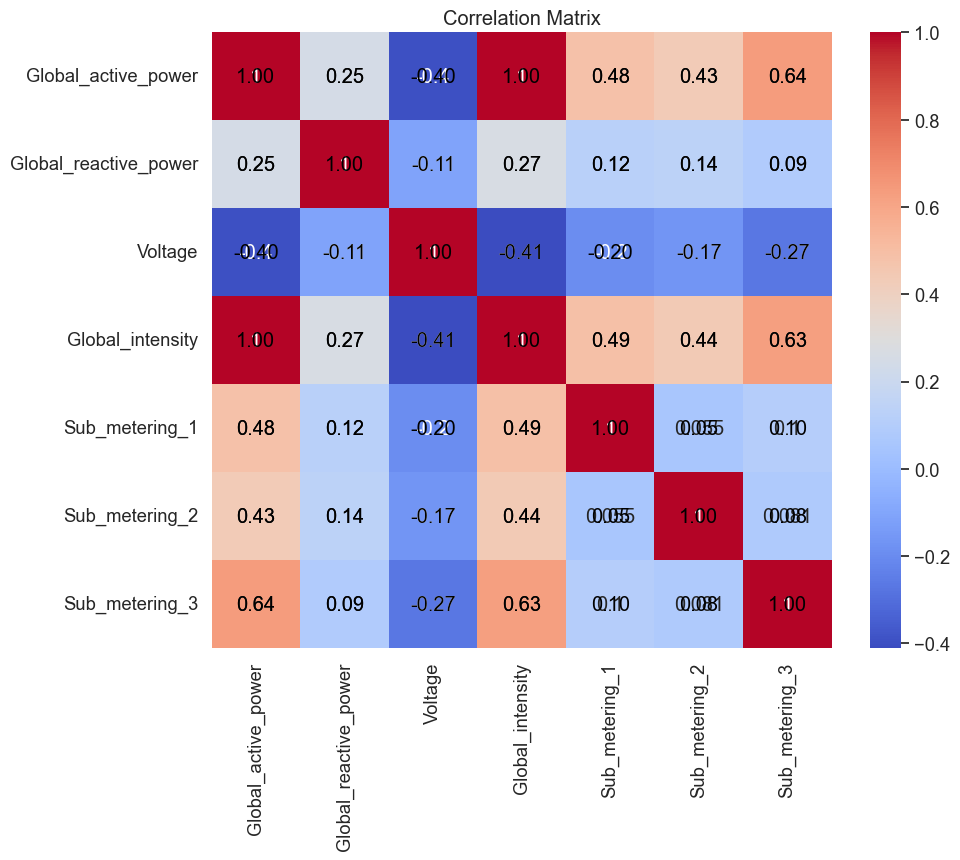

In [62]:
# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Annotate correlation values
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

plt.show()

### Outlier Analysis

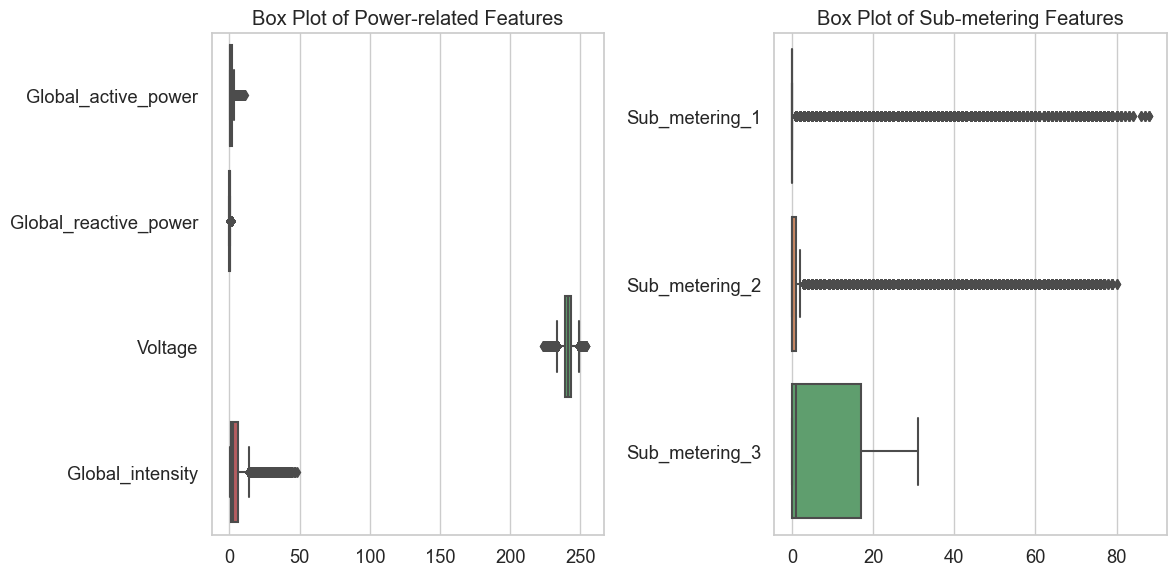

In [94]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], orient='h')
plt.title('Box Plot of Power-related Features')

plt.subplot(1, 2, 2)
sns.boxplot(data=data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], orient='h')
plt.title('Box Plot of Sub-metering Features')

plt.tight_layout()
plt.show()

### Time Series Analysis

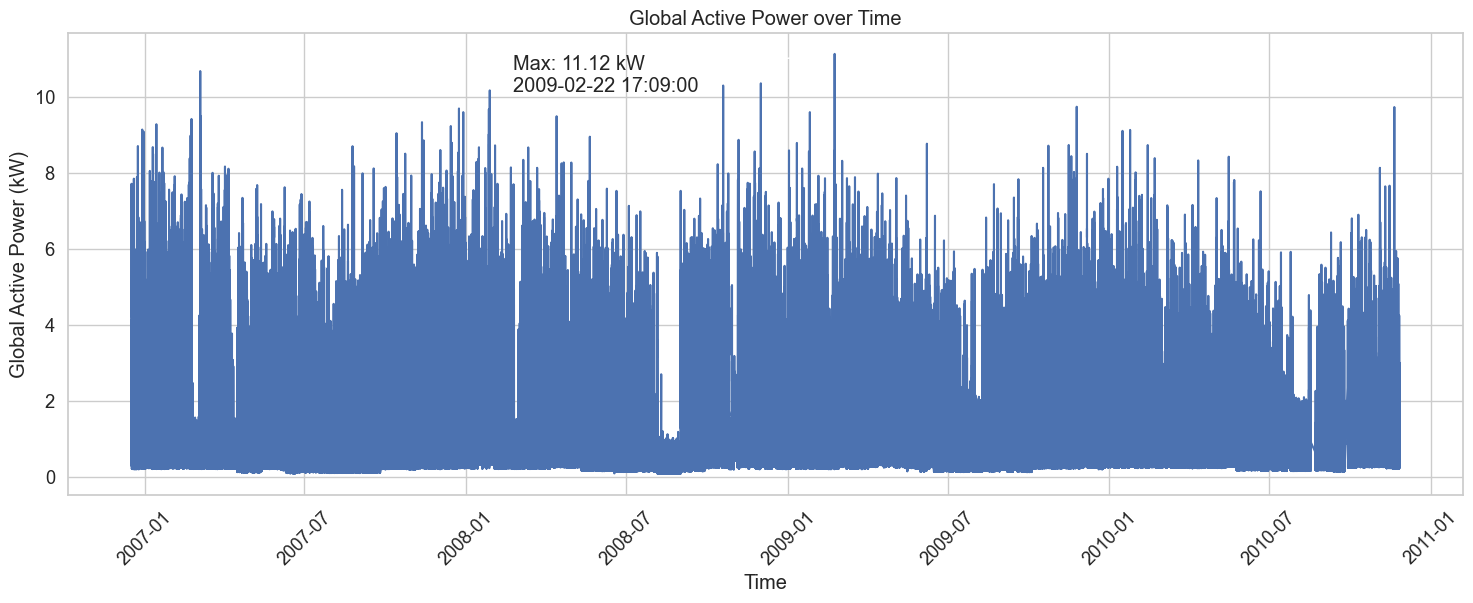

In [63]:
# Line plot of global_active_power over time
plt.figure(figsize=(18, 6))
plt.plot(data['datetime'], data['Global_active_power'])
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45)

# Annotate maximum value
max_power_index = data['Global_active_power'].idxmax()
max_power_value = data.loc[max_power_index, 'Global_active_power']
max_power_time = data.loc[max_power_index, 'datetime']
plt.annotate(f'Max: {max_power_value:.2f} kW\n{max_power_time}', xy=(max_power_time, max_power_value),
             xytext=(max_power_time - pd.DateOffset(months=12), max_power_value - 1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

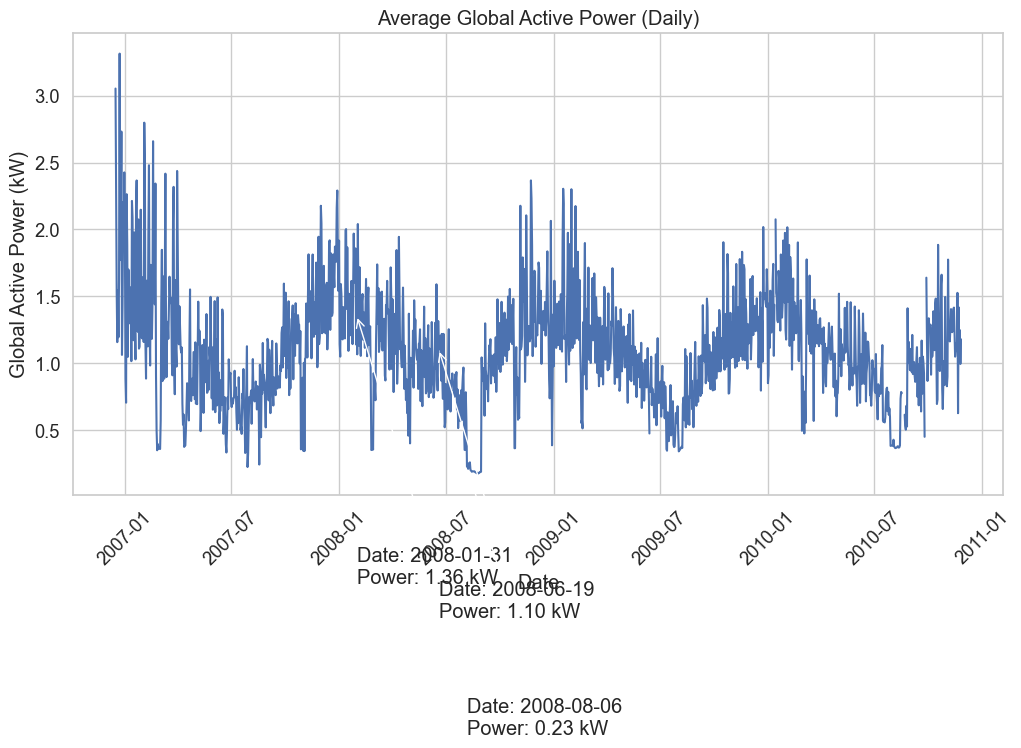

In [72]:
# Resample the data to a daily frequency and plot the average global_active_power
daily_data = data.resample('D', on='datetime').mean()
plt.figure(figsize=(18, 6))
plt.plot(daily_data.index, daily_data['Global_active_power'])
plt.title('Average Global Active Power (Daily)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=45)

# Annotate specific points
highlight_dates = daily_data.sample(3, random_state=42).index
highlight_powers = daily_data.loc[highlight_dates, 'Global_active_power']

for i in range(len(highlight_dates)):
    plt.annotate(f'Date: {highlight_dates[i].strftime("%Y-%m-%d")}\nPower: {highlight_powers.iloc[i]:.2f} kW',
                 xy=(highlight_dates[i], highlight_powers.iloc[i]),
                 xytext=(highlight_dates[i], highlight_powers.iloc[i] - 2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

### Feature Engineering

In [90]:
def perform_feature_engineering(data):
    # Extract date-related features
    # Calculate active energy consumed every minute
    data['active_energy'] = data['Global_active_power'] * 1000 / 60 - data['Sub_metering_1'] - data['Sub_metering_2'] - data['Sub_metering_3']
    data['year'] = data['datetime'].dt.year
    data['month'] = data['datetime'].dt.month
    data['day'] = data['datetime'].dt.day
    data['hour'] = data['datetime'].dt.hour
    data['minute'] = data['datetime'].dt.minute
    data['weekday'] = data['datetime'].dt.weekday

    # Calculate the total sub-metering energy
    data['total_sub_metering'] = data['Sub_metering_1'] + data['Sub_metering_2'] + data['Sub_metering_3']
    # Additional features
    data['power_intensity'] = data['Global_active_power'] / data['Global_intensity']
    data['power_voltage'] = data['Global_active_power'] / data['Voltage']
    data['sub_metering_ratio'] = data['Sub_metering_1'] / (data['Sub_metering_2'] + data['Sub_metering_3'] + 1)

    return data

data = perform_feature_engineering(data)


#### Exploration of Generated Features

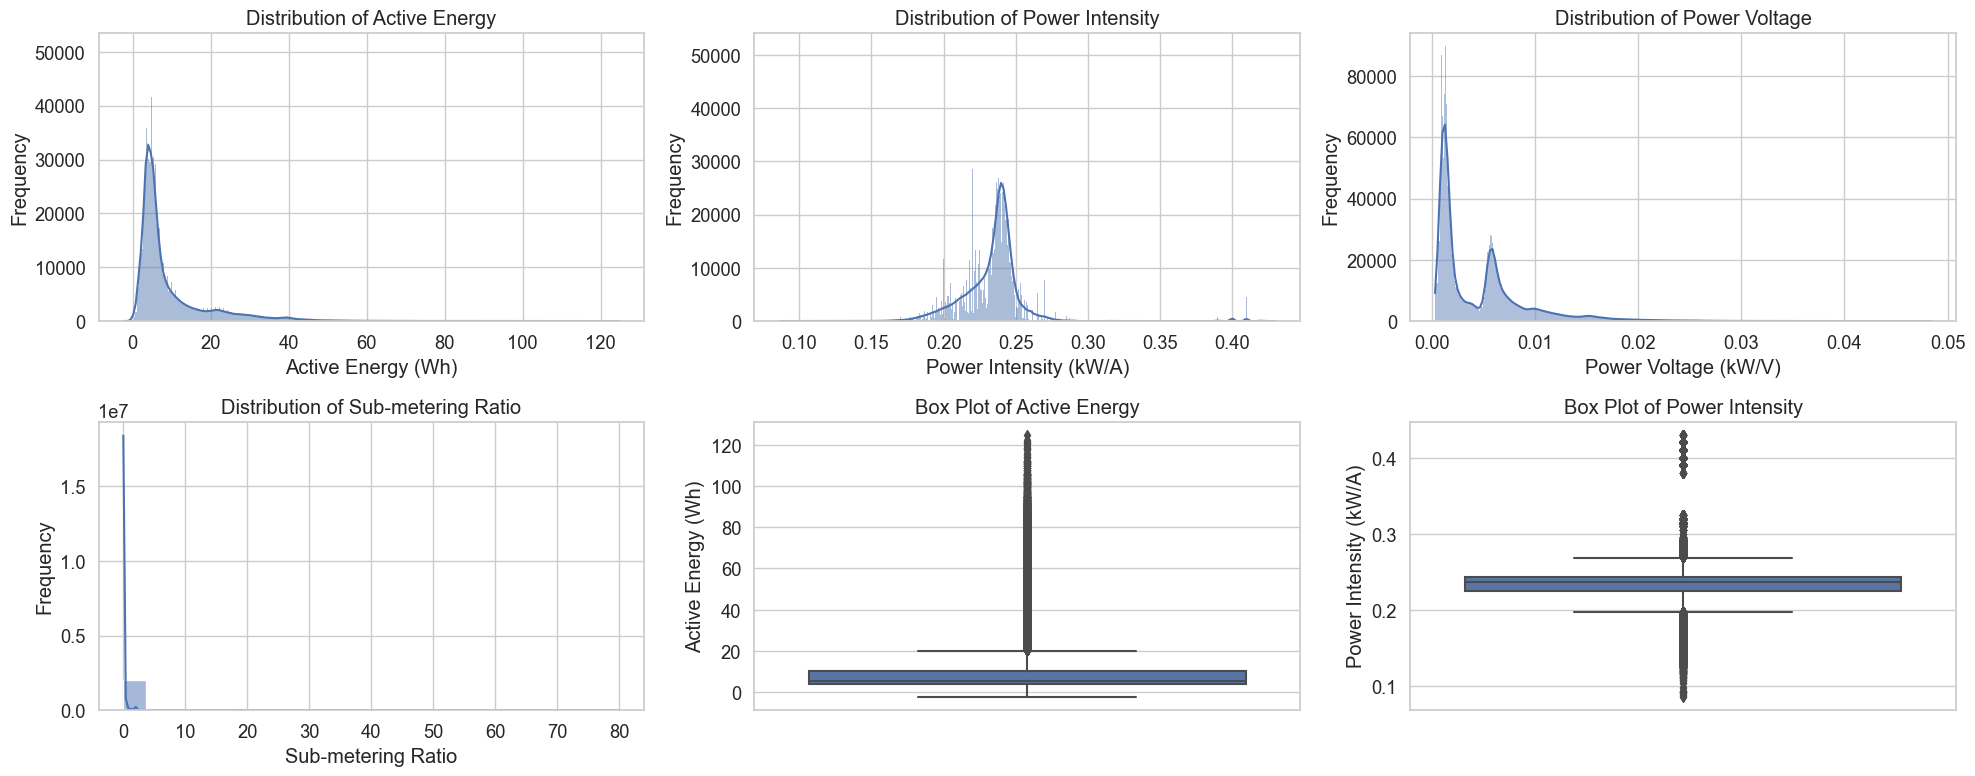

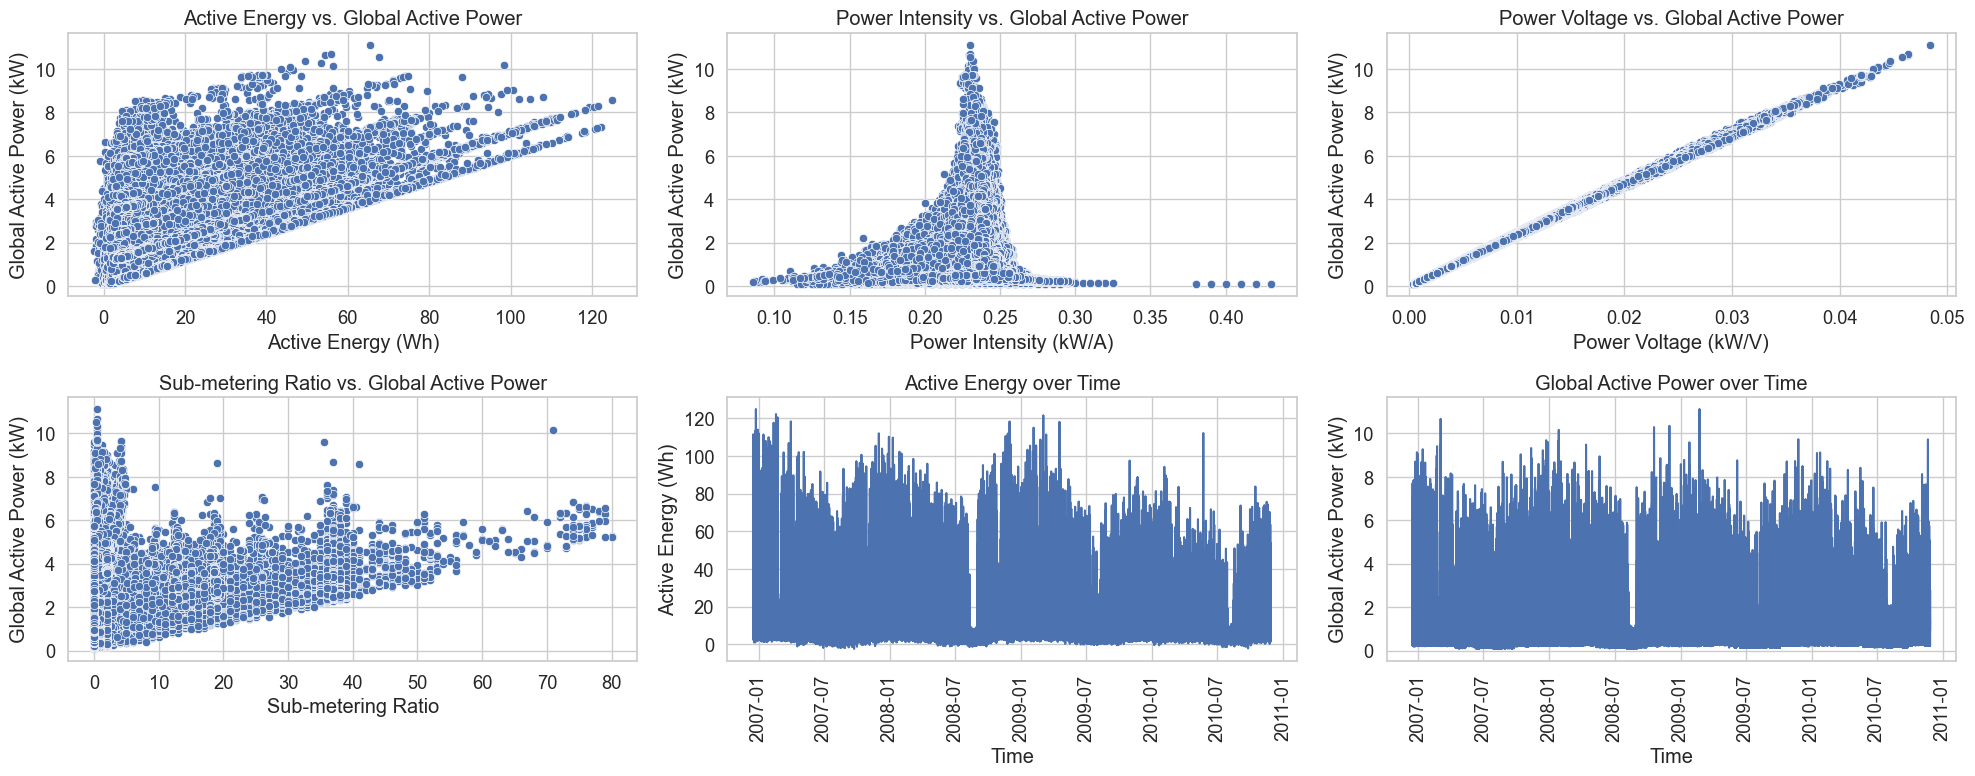

In [95]:
# Visualize Data Distribution
plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
sns.histplot(data=data, x='active_energy', kde=True)
plt.title('Distribution of Active Energy')
plt.xlabel('Active Energy (Wh)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
sns.histplot(data=data, x='power_intensity', kde=True)
plt.title('Distribution of Power Intensity')
plt.xlabel('Power Intensity (kW/A)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(data=data, x='power_voltage', kde=True)
plt.title('Distribution of Power Voltage')
plt.xlabel('Power Voltage (kW/V)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(data=data, x='sub_metering_ratio', kde=True)
plt.title('Distribution of Sub-metering Ratio')
plt.xlabel('Sub-metering Ratio')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.boxplot(data=data, y='active_energy')
plt.title('Box Plot of Active Energy')
plt.ylabel('Active Energy (Wh)')

plt.subplot(2, 3, 6)
sns.boxplot(data=data, y='power_intensity')
plt.title('Box Plot of Power Intensity')
plt.ylabel('Power Intensity (kW/A)')

plt.tight_layout()
plt.show()

# Explore Relationships and Correlations
plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(data=data, x='active_energy', y='Global_active_power')
plt.title('Active Energy vs. Global Active Power')
plt.xlabel('Active Energy (Wh)')
plt.ylabel('Global Active Power (kW)')

plt.subplot(2, 3, 2)
sns.scatterplot(data=data, x='power_intensity', y='Global_active_power')
plt.title('Power Intensity vs. Global Active Power')
plt.xlabel('Power Intensity (kW/A)')
plt.ylabel('Global Active Power (kW)')

plt.subplot(2, 3, 3)
sns.scatterplot(data=data, x='power_voltage', y='Global_active_power')
plt.title('Power Voltage vs. Global Active Power')
plt.xlabel('Power Voltage (kW/V)')
plt.ylabel('Global Active Power (kW)')

plt.subplot(2, 3, 4)
sns.scatterplot(data=data, x='sub_metering_ratio', y='Global_active_power')
plt.title('Sub-metering Ratio vs. Global Active Power')
plt.xlabel('Sub-metering Ratio')
plt.ylabel('Global Active Power (kW)')

plt.subplot(2, 3, 5)
sns.lineplot(data=data, x='datetime', y='active_energy')
plt.title('Active Energy over Time')
plt.xlabel('Time')
plt.ylabel('Active Energy (Wh)')
plt.xticks(rotation=90)

plt.subplot(2, 3, 6)
sns.lineplot(data=data, x='datetime', y='Global_active_power')
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
